In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df = pd.read_csv('responses.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [ ]:
# preparing the data set
# cut the relevant coulumns fo music from dataset

df_music = df.loc[:, ['Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock',
                      'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera','Gender']]

df_music.head(10)

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Gender
0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,female
1,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,female
2,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,female
3,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0,2.0,1.0,2.0,5.0,1.0,2.0,1.0,female
4,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,2.0,5.0,3.0,2.0,1.0,2.0,4.0,2.0,2.0,female
5,2.0,3.0,2.0,3.0,3.0,2.0,5.0,5.0,3.0,4.0,3.0,4.0,4.0,5.0,3.0,1.0,3.0,male
6,5.0,3.0,1.0,2.0,2.0,5.0,3.0,1.0,1.0,3.0,1.0,1.0,2.0,3.0,3.0,5.0,2.0,female
7,3.0,2.0,1.0,2.0,2.0,4.0,5.0,1.0,2.0,3.0,2.0,2.0,3.0,1.0,2.0,3.0,2.0,male
8,3.0,1.0,1.0,2.0,4.0,3.0,5.0,5.0,1.0,1.0,2.0,2.0,2.0,NaN,1.0,1.0,1.0,female
9,2.0,5.0,2.0,2.0,5.0,3.0,5.0,2.0,3.0,2.0,4.0,4.0,4.0,4.0,5.0,1.0,2.0,female


In [ ]:
# convert values '4','5' to 3, '3' to 2, '1','2' to 1

number_mapping = {
           1: 1,
           2: 1,
           3: 2,
           4: 3,
           5: 3}

for columns in df_music:
  if (columns != 'Gender'):
    df_music[columns] = df_music[columns].map(number_mapping)
df_music = df_music.dropna()
df_music.head(5)

,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Gender
0,1.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,female
1,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,3.0,1.0,2.0,1.0,3.0,3.0,1.0,1.0,1.0,female
2,1.0,1.0,2.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,2.0,female
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,female
4,3.0,2.0,1.0,3.0,2.0,3.0,2.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,female


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Define X and y variables for the logistic regression model
X = df_music.drop('Gender', axis=1) # Drop the gender column from X
y = df_music['Gender']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Print the coefficients with the corresponding column names
coef_df = pd.DataFrame({'coef': model.coef_[0], 'name': X.columns})
print(coef_df)


        coef               name
0  -0.067700              Dance
1   0.115008               Folk
2   0.318786            Country
3   0.238711    Classical music
4  -0.546892            Musical
5  -0.107924                Pop
6  -0.087784               Rock
7   0.523932  Metal or Hardrock
8  -0.211730               Punk
9   0.283665        Hiphop, Rap
10 -0.000871        Reggae, Ska
11 -0.057241        Swing, Jazz
12  0.038051        Rock n roll
13 -0.005494        Alternative
14 -0.649000             Latino
15  0.430957     Techno, Trance
16 -0.010214              Opera


This output shows the coefficients of the logistic regression model for each music genre. The coefficient represents the change in log odds of the dependent variable (gender) for a one-unit increase in the independent variable (music preference). A positive coefficient indicates a positive relationship between the independent variable and the dependent variable, while a negative coefficient indicates a negative relationship.

For example, in this output, the coefficient for "Metal or Hardrock" is 0.523932, which means that for a one-unit increase in preference for Metal or Hardrock music, the log odds of the dependent variable (gender) increase by 0.523932. This suggests that people who like Metal or Hardrock music are more likely to be male.

To determine which music genres are preferred more by males or females, you can examine the coefficients and compare them between male and female categories. If the coefficient is positive for males and negative for females, it suggests that males prefer the genre more than females. Conversely, if the coefficient is negative for males and positive for females, it suggests that females prefer the genre more than males.

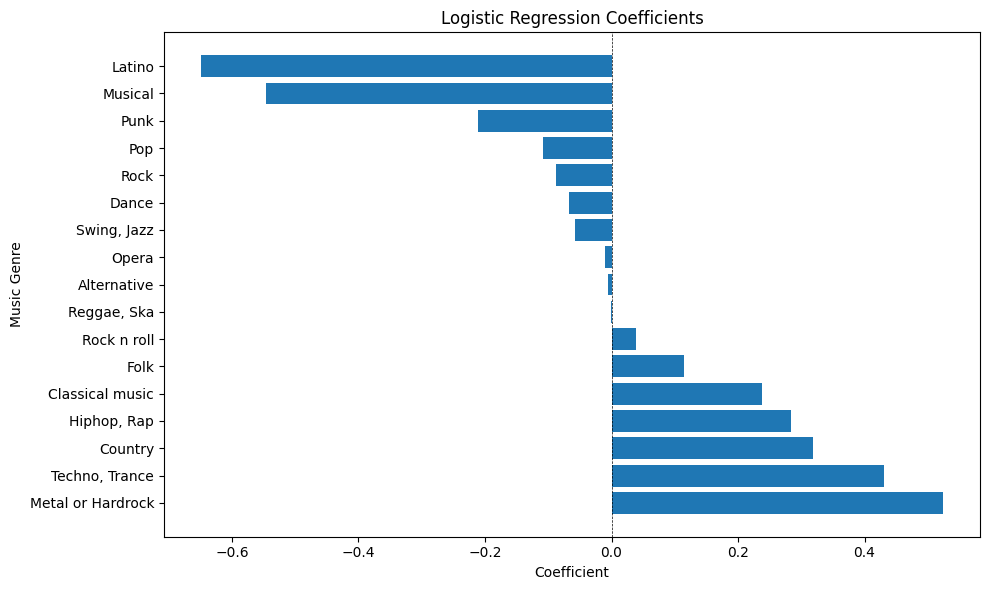

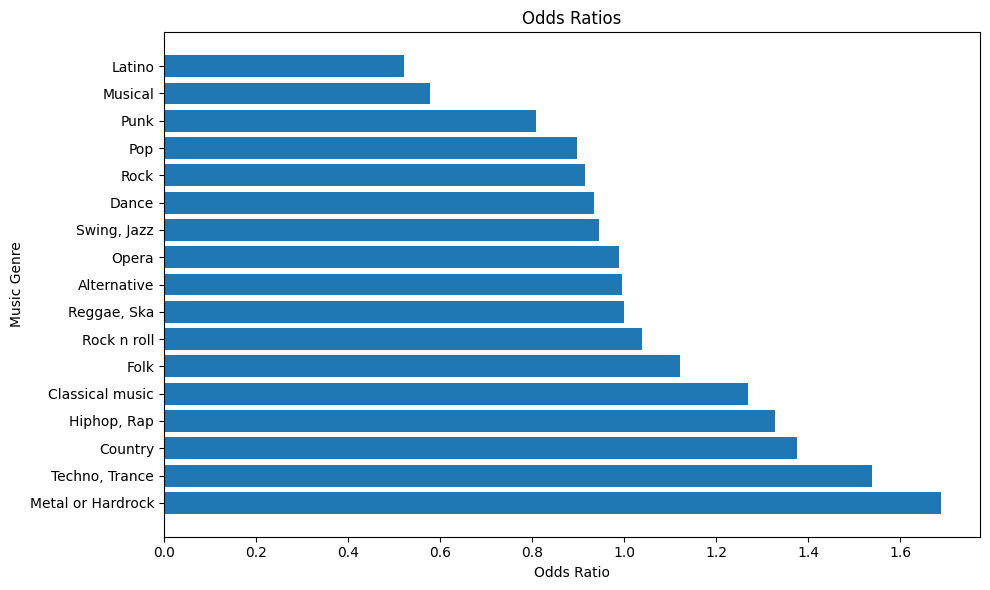

In [ ]:
import matplotlib.pyplot as plt

# Get the coefficients and odds ratios
coef_df = pd.DataFrame({'name': X.columns, 'coef': model.coef_[0]})
coef_df['odds_ratio'] = np.exp(coef_df['coef'])

# Plot the coefficients and odds ratios
fig, ax = plt.subplots(figsize=(10,6))
coef_df.sort_values('coef', ascending=False, inplace=True)
ax.barh(coef_df['name'], coef_df['coef'])
ax.set_title('Logistic Regression Coefficients')
ax.set_xlabel('Coefficient')
ax.set_ylabel('Music Genre')
ax.axvline(x=0, color='black', linewidth=0.5, linestyle='--')
plt.tight_layout()

fig, ax = plt.subplots(figsize=(10,6))
coef_df.sort_values('odds_ratio', ascending=False, inplace=True)
ax.barh(coef_df['name'], coef_df['odds_ratio'])
ax.set_title('Odds Ratios')
ax.set_xlabel('Odds Ratio')
ax.set_ylabel('Music Genre')
plt.tight_layout()

plt.show()


The odds ratio is the exponentiated value of the coefficient, which represents the change in odds of being male for each one-unit increase in the predictor variable. For example, the odds ratio for "Metal or Hardrock" is exp(0.523932) = 1.6888, which means that for each one-unit increase in preference for "Metal or Hardrock" music, the odds of the person being male are 1.6888 times higher than the odds of the person being female.

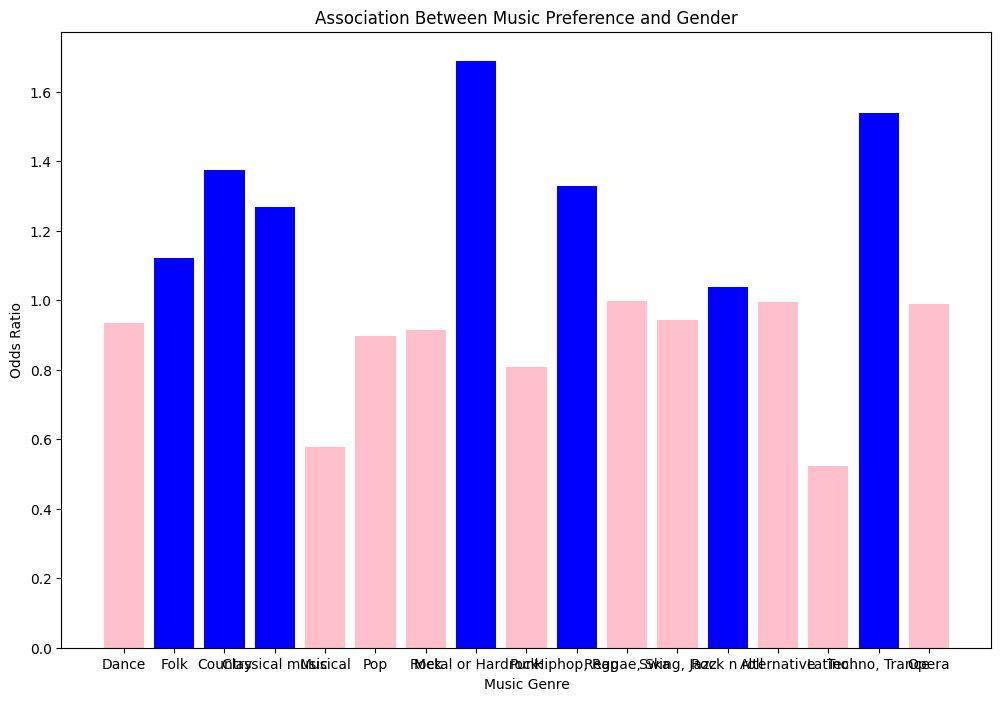

In [ ]:
# create a dataframe to store the coefficients and odds ratios
coef_df = pd.DataFrame({'coef': model.coef_[0], 'name': X.columns})

# calculate the odds ratios
coef_df['odds_ratio'] = np.exp(coef_df['coef'])

# set the color of the bars based on gender
coef_df['color'] = np.where(coef_df['coef']>0, 'blue', 'pink')

# plot the bar chart
fig, ax = plt.subplots(figsize=(12, 8))
ax.bar(coef_df['name'], coef_df['odds_ratio'], color=coef_df['color'])

# set the labels and title
ax.set_xlabel('Music Genre')
ax.set_ylabel('Odds Ratio')
ax.set_title('Association Between Music Preference and Gender')

plt.show()

In [ ]:

print(model.coef_)


[[-0.06770006  0.11500827  0.31878554  0.23871051 -0.5468919  -0.1079243
  -0.08778396  0.52393173 -0.21172962  0.28366505 -0.00087135 -0.05724137
   0.03805113 -0.00549428 -0.64899979  0.43095659 -0.01021361]]
